# How to generate topological constraints using the Open Tree of Life

Stuff for the Jupyter notebook which you can ignore...

In [86]:
library(repr)
options(repr.plot.width = 8, repr.plot.height = 3)

To retrieve topologies from the Open Tree of Life, we need the ``rotl`` R package. We'll also load the ape package to manipulate the tree.

In [91]:
install.packages("rotl")
library("rotl")
library("ape")

Installing package into ‘/home/dgkontopoulos/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


Now, let's create a vector of species names for which we want a tree topology and match them to those of the Open Tree taxonomy:

In [94]:
species <- c(
    "Homo sapiens", "Felis catus", "Crocodylus niloticus", "Nymphicus hollandicus", 
    "Vitis vinifera", "Geobacter daltonii", "Thermoplasma acidophilum", "Caulophacus agassizi", 
    "Caulophacus arcticus", "Caulophacus cyanae", "Caulophacus galatheae"
)

resolved_names <- tnrs_match_names(species)
resolved_names

search_string,unique_name,approximate_match,ott_id,is_synonym,flags,number_matches
homo sapiens,Homo sapiens,FALSE,770315,FALSE,,1
felis catus,Felis catus,FALSE,563166,FALSE,,2
crocodylus niloticus,Crocodylus niloticus,FALSE,35864,FALSE,,2
nymphicus hollandicus,Nymphicus hollandicus,FALSE,630645,FALSE,,1
vitis vinifera,Vitis vinifera,FALSE,756728,FALSE,,6
geobacter daltonii,Geobacter daltonii,FALSE,489275,FALSE,,1
thermoplasma acidophilum,Thermoplasma acidophilum,FALSE,891210,FALSE,,1
caulophacus agassizi,Caulophacus agassizi,FALSE,2832726,FALSE,,1
caulophacus arcticus,Caulophacus arcticus,FALSE,612407,FALSE,,1
caulophacus cyanae,Caulophacus cyanae,FALSE,4939783,FALSE,,1


Return the subset of the Open Tree of Life that contains the matched species:

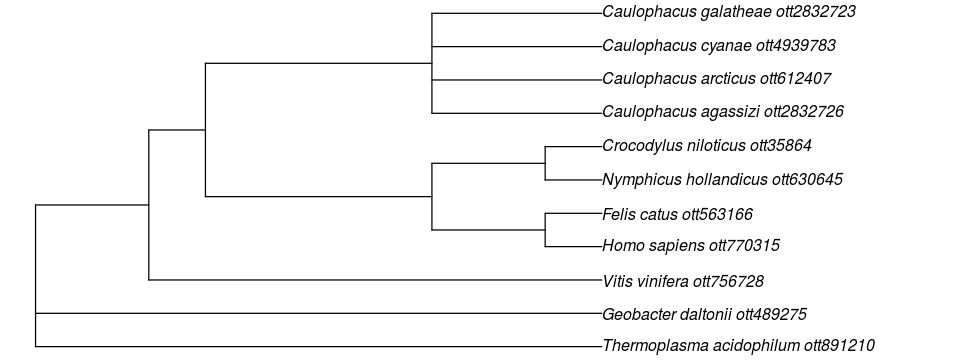

In [81]:
tree <- tol_induced_subtree(ott_ids=ott_id(resolved_names))
plot(tree, cex = 0.8, no.margin = TRUE)

The tree may also contain the names of some of its clades:

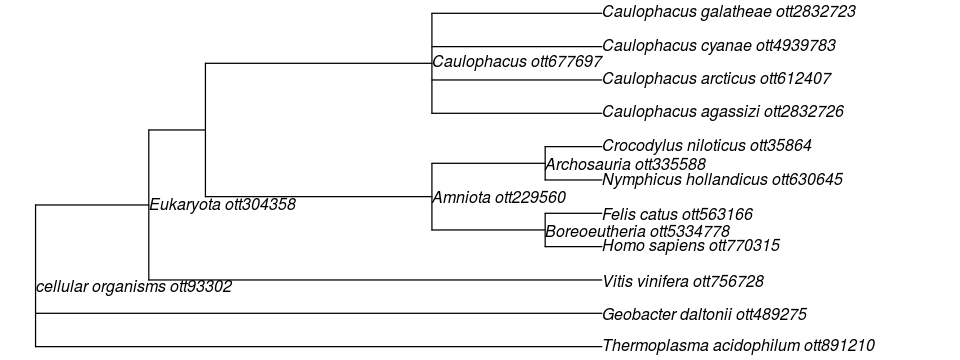

In [80]:
plot(tree, cex = 0.8, show.node.label = TRUE, no.margin = TRUE)

To infer phylogenies under the constraints of this tree, we have to remove the ott\* IDs from species names and save the tree to a file. 

The former can be done with a small regular expression:

In [92]:
tree$tip.label <- gsub("_ott\\d+$", "", tree$tip.label)
tree$tip.label

write.tree(tree, file = 'constraint_tree.phy')

[1] "Homo_sapiens"             "Felis_catus"             
 [3] "Nymphicus_hollandicus"    "Crocodylus_niloticus"    
 [5] "Caulophacus_agassizi"     "Caulophacus_arcticus"    
 [7] "Caulophacus_cyanae"       "Caulophacus_galatheae"   
 [9] "Vitis_vinifera"           "Thermoplasma_acidophilum"
[11] "Geobacter_daltonii"

Ta-daaa! Our constraint tree is ready! A number of phylogeny inference programs can use it to constrain topological exploration:

* **RAxML** and **IQ-TREE:** -g path_to_constraint_tree


* **PhyML:** -u=path_to_constraint_tree --constraint_file=path_to_constraint_tree


* **MrBayes:** use the function **``createMrBayesConstraints``** in the R package **``paleotree``** to generate a MrBayes NEXUS block of topological constraints from the tree. Next, paste the block to the input file to be read by MrBayes.